In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#set visualization style
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#The Dataset
df = pd.read_csv('../data/healthcare-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [6]:
print("Shape:", df.shape)

Shape: (5110, 12)


In [7]:
#inspecting for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

bmi    201
dtype: int64

In [8]:
#check for duplicates
duplicate = df.duplicated().sum()
duplicate

0

### Handle Missing Values


In [9]:
#replace 'N/A' with NaN
df['bmi'] = df['bmi'].replace('N/A', np.nan)

In [10]:
#convert bmi to numeric
df['bmi'] = pd.to_numeric(df['bmi'])

In [11]:
#check for missing values again
print("Missing values: ")
df.isnull().sum()

Missing values: 


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
#impute missing bmi values with median
bmi_median = df['bmi'].median()
df['bmi'].fillna(bmi_median, inplace=True)

In [13]:
#verify no missing values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Fix Data Types

In [14]:
#current data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
#convert categorical columns to category type
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [16]:
#ensuring numeric columns are correct
df['age'] = df['age'].astype(float)
df['hypertension'] = df['hypertension'].astype(int)
df['heart_disease'] = df['heart_disease'].astype(int)
df['avg_gluclose_level'] = df['avg_glucose_level'].astype(float)
df['stroke'] = df['stroke'].astype(int)

In [17]:
#verifying data types
print("\nUpdated Data Types: ")
df.dtypes


Updated Data Types: 


id                       int64
gender                category
age                    float64
hypertension             int32
heart_disease            int32
ever_married          category
work_type             category
Residence_type        category
avg_glucose_level      float64
bmi                    float64
smoking_status        category
stroke                   int32
avg_gluclose_level     float64
dtype: object

### Clean Specific Columns

In [18]:
#check for unique values in categorical columns
for col in categorical_cols:
    print("\nUnique values in {col}: ")
    print(df[col].value_counts())


Unique values in {col}: 
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Unique values in {col}: 
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Unique values in {col}: 
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Unique values in {col}: 
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Unique values in {col}: 
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [19]:
#handle rare categories in 'gender' (if 'other' exists within low frequency)
if 'Other' in df['gender'].cat.categories and df['gender'].value_counts()['Other'] < 10:
    df['gender'] = df['gender'].replace('Other', 'Female') #replaces with most frequent category

In [20]:
#verify cleaning
print("\nAfter cleaning 'gender': ")
print(df['gender'].value_counts())


After cleaning 'gender': 
gender
Female    2995
Male      2115
Name: count, dtype: int64


## Data Visualization

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


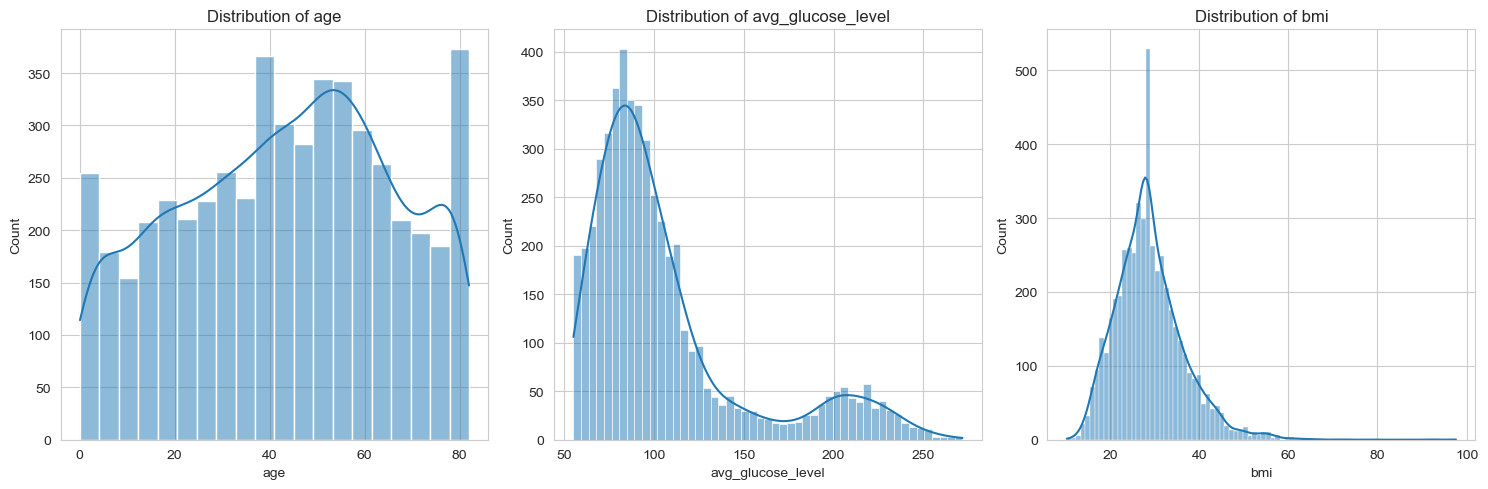

In [21]:
#distribution of numeric features
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numeric-features-distribution.png')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int32' object has no attribute 'startswith'

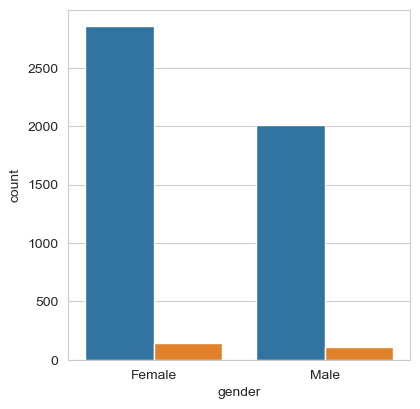

In [34]:
#stroke prevalence by categorical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f'Stroke by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stroke-by-categorical-features.png')
plt.show()

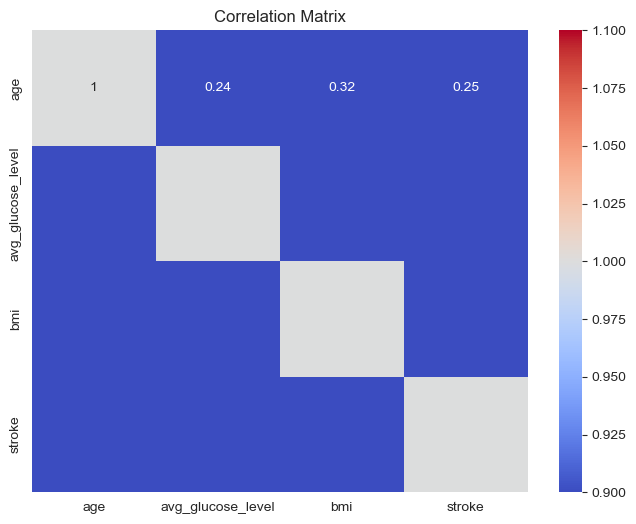

In [23]:
#correlation matrix for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols + ['stroke']].corr(), annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation-matrix.png')
plt.show()

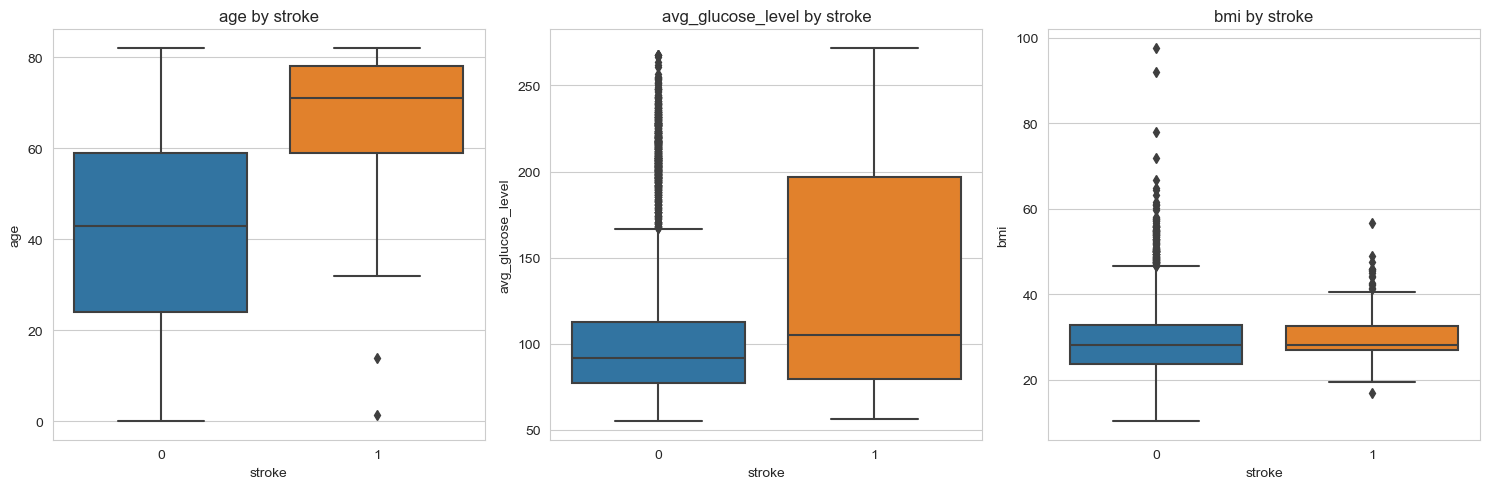

In [24]:
#boxplot of numeric features by stroke
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'{col} by stroke')
plt.tight_layout()
plt.savefig('numeric-features=by-stroke.png')
plt.show()

## Feature Engineering

In [25]:
#creating age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [26]:
#creating glucose level categories
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 70, 100, 125, 500], labels=['Low', 'Normal', 'Prediabetes', 'High'])

In [27]:
#creating bmi categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [28]:
#encoding the categorical variables for modeling
le = LabelEncoder()
encoded_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in encoded_cols:
    df[f'{col}_encoded'] = le.fit_transform(df[col])

In [29]:
#The new features
print("\nNew Features: ")
df[['age_group', 'glucose_category', 'bmi_category'] + [f'{col}_encoded' for col in encoded_cols]].head()


New Features: 


,age_group,glucose_category,bmi_category,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,Senior,High,Obese,1,1,2,1,1
1,Senior,High,Overweight,0,1,3,0,2
2,Senior,Prediabetes,Obese,1,1,2,0,2
3,Adult,High,Obese,0,1,2,1,3
4,Senior,High,Normal,0,1,3,0,2


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

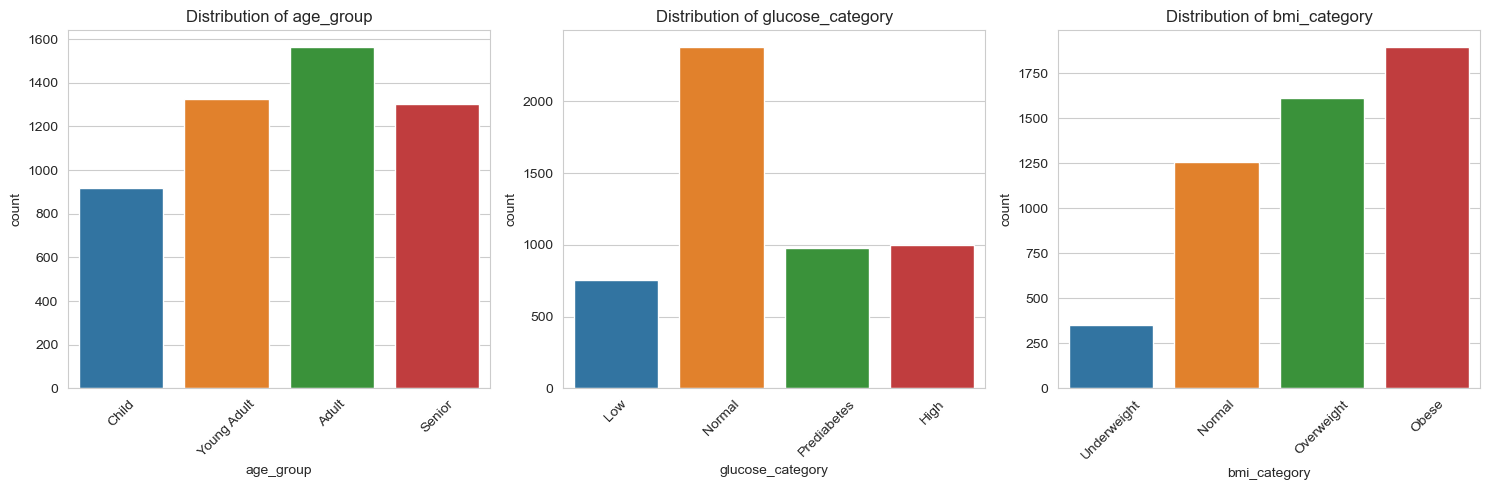

In [30]:
#Distribution of engineered categorical features
engineered_cols = ['age_group', 'glucose_category', 'bmi_category']
plt.figure(figsize=(15, 5))
for i, col in enumerate(engineered_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, order=df[col].cat.categories)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('engineered_features_distribution.png')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int32' object has no attribute 'startswith'

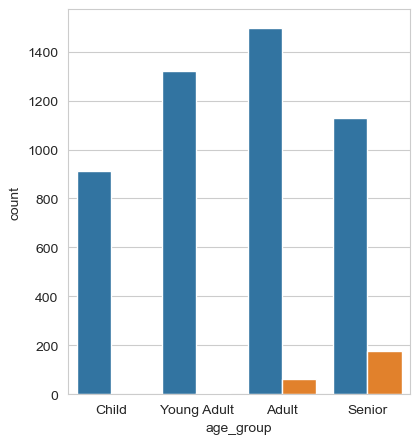

In [31]:
#stroke prevalence by engineered feature
plt.figure(figsize=(15, 5))
for i, col in enumerate(engineered_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, hue='stroke', data=df, order=df[col].cat.categories)
    plt.title(f'Stroke by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stroke_by_engineered_features.png')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_27372\3415524268.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_proportion = df.groupby(col)['stroke'].mean().reindex(df[col].cat.categories)
C:\Users\DELL\AppData\Local\Temp\ipykernel_27372\3415524268.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_proportion = df.groupby(col)['stroke'].mean().reindex(df[col].cat.categories)
C:\Users\DELL\AppData\Local\Temp\ipykernel_27372\3415524268.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

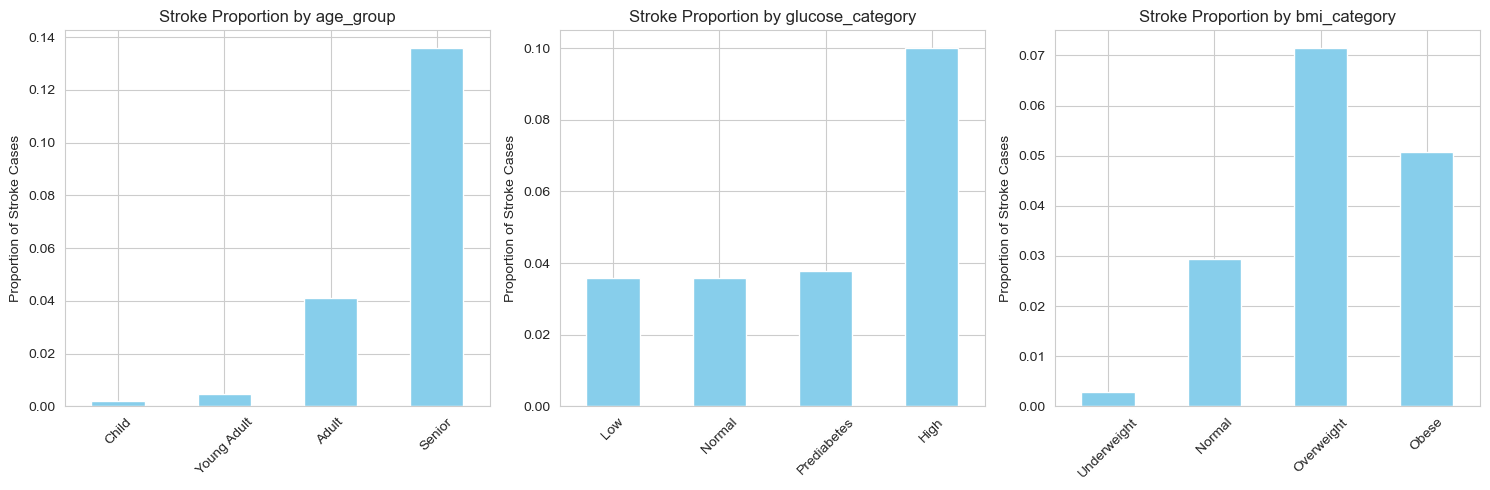

In [32]:
#Proportion of stroke cases by engineered features
plt.figure(figsize=(15, 5))
for i, col in enumerate(engineered_cols, 1):
    plt.subplot(1, 3, i)
    stroke_proportion = df.groupby(col)['stroke'].mean().reindex(df[col].cat.categories)
    stroke_proportion.plot(kind='bar', color='skyblue')
    plt.title(f'Stroke Proportion by {col}')
    plt.ylabel(f'Proportion of Stroke Cases')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stroke_proportion_engineered_features.png')
plt.show()

In [35]:
#saving...
df.to_csv('health_stroke_data_cleaned.csv', index=False)
print("Cleaned dataset saved as 'health_stroke_data_cleaned.csv'")

Cleaned dataset saved as 'health_stroke_data_cleaned.csv'


## Summary

- Cleaned missing `bmi` values using median imputation.
- Fixed data types for categorical and numeric columns.
- Visualized distributions and relationships for original and engineered features.
- Engineered features: `age_group`, `glucose_category`, `bmi_category`, and encoded categorical variables.
- Created visualizations for engineered features to access their impact on stroke risk.
- Saved cleaned dataset for modeling.